In [2]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
data = pd.read_csv(r'E:\code alpha\task-1\titanic.csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.info()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

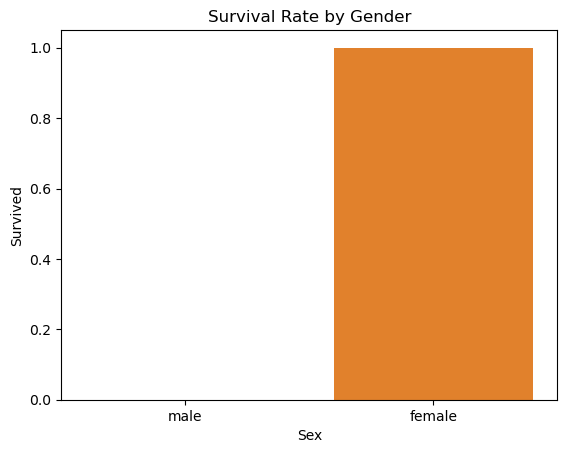

In [7]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()



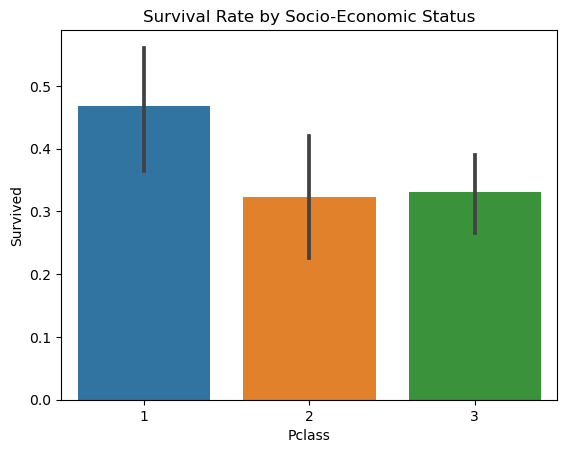

In [8]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Socio-Economic Status')
plt.show()



C:\Users\eswar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


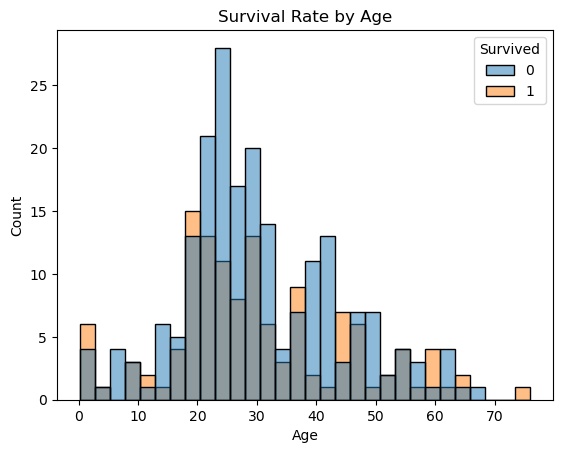

In [9]:
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=False)
plt.title('Survival Rate by Age')
plt.show()


In [19]:
data['Age'].fillna(data['Age'].median(), inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

if 'Name' in data.columns and 'Ticket' in data.columns and 'PassengerId' in data.columns:
    data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

print("Missing values before imputation:\n", data.isnull().sum())

data.fillna(data.median(), inplace=True)

print("Missing values after imputation:\n", data.isnull().sum())

data.head()


Missing values before imputation:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64
Missing values after imputation:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [20]:
X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 100.00%


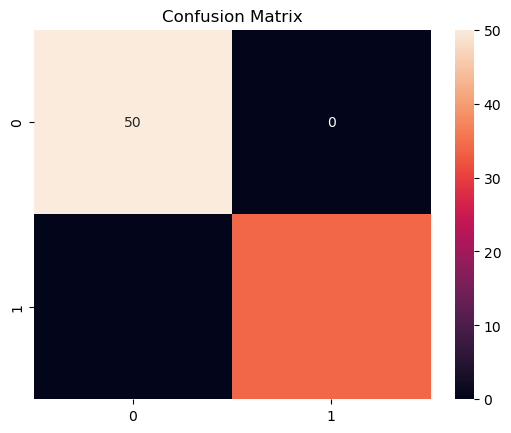

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))


In [22]:
new_data = pd.DataFrame({
    'Pclass': [3],          
    'Sex': [0],             
    'Age': [25],            
    'SibSp': [0],           
    'Parch': [0],           
    'Fare': [7.25],         
    'Embarked': [1]        
})

predicted_survival = model.predict(new_data)

if predicted_survival[0] == 1:
    print("The person survived.")
else:
    print("The person did not survive.")


The person survived.


In [24]:
new_data = pd.DataFrame({
    'Pclass': [3],          
    'Sex': [1],             
    'Age': [17],            
    'SibSp': [0],           
    'Parch': [0],           
    'Fare': [7.25],         
    'Embarked': [1]        
})

predicted_survival = model.predict(new_data)

if predicted_survival[0] == 1:
    print("The person survived.")
else:
    print("The person did not survive.")


The person did not survive.
